#### Why Generalized Linear Models?

In Regression, we predict a dependent variable from one or more independent variables.

The dependent variable is **numeric** and error is assumed to be **normally distributed**.

What if our dependent variable is **discrete** (0 or 1) or just **count data** and the error terms do not follow normal distribution?

Do we think our prediction would be good with the Linear Model?

**Limitations of Linear Models**

Linear Models are the most widely used models in Statistics. But they come with their own limitations.

- Not proficient in handling binary data.
- Not Accurate when count data (number of footfalls, number of pages visited etc.) is involved.
- Some variables have a constraint of being only strictly positive.

To fix some of these problems, we can go for Transformation.

In some scenarios, Transformation **minimises** interpretability, so we have to look for other alternatives.

**GLM**

To overcome some limitations of Linear Models, we can go for Generalized Linear Models (GLMs).

- Modeling is done on the **scale** in which the data was recorded.
- Honor the known assumptions of the data.

**GLM Components**

GLMs comprise of 3 components:

- Random Component that explains the data distribution of the response variable which further describes randomness/ errors.
$$ Y_i \sim N(\mu_i, \sigma^2) $$
- Systematic Component that consists of linear predictors (the covariate and the coefficient).
$$ \eta_i = \sum_{k=0} ^ {p} {x_k} {\beta_k} $$
- Link function that connects the mean of the response to predictors (in Systematic Component).
$$ g(\mu)= \eta $$

**Types of Generalized Models**

- Logistic Regression used for predicting binary outcomes.
- Poisson Regression used for predicting count data (# of footfalls, # of hits on a website etc.)

In [1]:
# Statistical Perspective
from __future__ import print_function
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# A dataset is created with scores a team got and Won or lost that respective game
scores = [(200,1),(100,0),(150,1),(320,1),(270,1),(134,0),(322,1),(140,0),(210,0),(199,0)]
labels = ['Score','Result']
df = pd.DataFrame.from_records(scores, columns=labels)
glm_binom = sm.GLM(df.Result, df.Score, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

# The value of the score coef tells us to what extent it is able to predict the likelihood of winning a game.
# The rest of the values are a standard outcome of a regression equation.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Result   No. Observations:                   10
Model:                            GLM   Df Residuals:                        9
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.6858
Date:                Tue, 28 Jul 2020   Deviance:                       13.372
Time:                        23:19:16   Pearson chi2:                     9.94
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Score          0.0021      0.003      0.688      0.4

In [2]:
# ML Perspective
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep = 2.0, random_state=101)

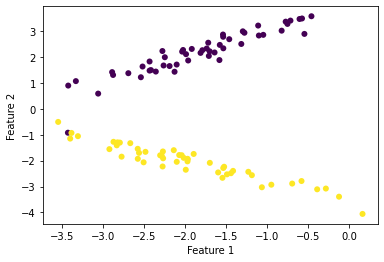

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            linewidth=0, edgecolor=None)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float),test_size=0.33, random_state=101)

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)
print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



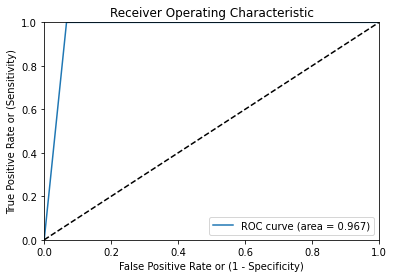

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_clf)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_clf)

array([[14,  1],
       [ 0, 18]])

**Why Poisson Regression ?**

One of the underlying assumptions of Linear Regression is that the error terms follow a normal distribution.

When the error terms do not follow normal distribution, we go for other types of Regression.

When we try to model count data (number of footfalls, traffic in a website etc.), we can go for Poisson Regression. 

In mathematical terms, Poisson Regression is used to model the **logarithm** of the count data.

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [8]:
dataset = pd.DataFrame({'A':np.random.rand(100)*1000, 
                        'B':np.random.rand(100)*100,  
                        'C':np.random.rand(100)*10, 
                        'target':np.random.randint(0, 5, 100)})
X = dataset[['A','B','C']]
X['constant'] = 1
y = dataset['target']
size = 1e5
nbeta = 3

In [9]:
pois_glm = sm.GLM(y, X, family=sm.families.Poisson())
pois_res = pois_glm.fit()
pois_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -155.72
Date:                Tue, 28 Jul 2020   Deviance:                       104.68
Time:                        23:19:17   Pearson chi2:                     82.5
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
A              0.0002      0.000      0.625      0.532      -0.000       0.001
B              0.0032      0.003      1.173      0.241      -0.002       0.009
C             -0.0728      0.028     -2.613      0.009      -0.127      -0.018
constant       0.6405      0.241      2.662      0.008       0.169       1.112
==============================================================================
"""

On viewing the results and the coefficient values, we can say to what extent each coef is explaining the log of count data i.e the dependent variable.

The rest of the values are what a regression output shows.

### Bayesian vs Linear Regression

Bayesian Regression is similar to Linear Regression in many ways.

- In Linear Regression, the output is number/ value.
- In Bayesian Regression, the output is also a value but it also returns the entire probability distribution.

**How is the Probability Distribution constructed in Bayesian Regression?**

Here, the predicted value and variance value are returned as an output. Therefore, with mean value and the variance value (as the standard deviation), the probability distribution can be constructed.

**Pros of Bayesian Regression**

- Robust to Gaussian Noise.
- Works well if the number of features and observations in the dataset are comparable.

**Cons of Bayesian Regression**

- Time-consuming.

In [10]:
from sklearn.linear_model import BayesianRidge
regr = BayesianRidge(compute_score=True)
regr.fit(X, y)
regr

BayesianRidge(compute_score=True)

### Ranking Problem

Consider a dataset with some features related to a car along with a price.

Insurance companies would want to assess if the car is riskier or not to sell/ buy on a given scale.

How should we design this problem?

**Approach**

The above problem can be modeled as a regression problem where we are predicting the risk on a scale.

The methodology to assess the prediction will be different.

In this scenario, we can go for **label ranking loss**, a metric that indicates the strength ranking.

Mean Absolute and Mean Standard Errors are not applicable in this scenario.

Another way to measure the prediction accuracy is by **Label Ranking Average Precision**.

### Examples: Basic Regression

In [11]:
import pandas as pd

price = [160,180,200,220,240,260,280,300]
sale = [126,103,82,75,82,40,20, 15]
priceDF = pd.DataFrame(price, columns=list('x'))
saleDF = pd.DataFrame(sale, columns=list('y'))
houseDf = pd.concat((priceDF, saleDF), axis=1)

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smfModel = smf.ols('y~x', data=houseDf).fit()
print(smfModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     88.14
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           8.29e-05
Time:                        23:19:17   Log-Likelihood:                -29.217
No. Observations:                   8   AIC:                             62.43
Df Residuals:                       6   BIC:                             62.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    247.3571     19.493     12.690      0.0

/Users/smithkakar/anaconda3/envs/ds/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


- **DF Residuals:** The degrees of freedom of the residuals (difference between the number of observations and parameters).
- **DF Model:** The degrees of freedom of the model (number of parameters estimated in the model excluding the constant term).
- **R-squared:** Measure that says how well the model has performed with respect to the baseline model.

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
import pandas as pd 
boston = load_boston()
california = fetch_california_housing()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
print(dataset.head()) 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


**Multiple Linear Regression**

In [14]:
import pandas as pd
price = [160,180,200,220,240,260,280]
sale = [126,103,82,75,82,40,20]
cars = [0,9,19,5,25,1,20]
priceDF = pd.DataFrame(price, columns=list('x'))
saleDF = pd.DataFrame(sale, columns=list('y'))
carsDf = pd.DataFrame(cars, columns=list('z'))
houseDf = pd.concat([priceDF, saleDF, carsDf],axis=1)

In [15]:
X = houseDf.drop(['y'], axis=1)
y = houseDf.y
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

/Users/smithkakar/anaconda3/envs/ds/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     22.74
Date:                Tue, 28 Jul 2020   Prob (F-statistic):            0.00654
Time:                        23:19:19   Log-Likelihood:                -25.654
No. Observations:                   7   AIC:                             57.31
Df Residuals:                       4   BIC:                             57.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        252.8597     26.812      9.431      0.001     178.417     327.302
x             -0.8249      0.128     -6.445      0.003      -1.180      -0.470
z              0.3593      0.552      0.650      0.551      -1.174       1.893
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.646
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.407
Skew:                           0.546   Prob(JB):                        0.816
Kurtosis:                       2.549   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note:**
- If the coef is zero, then that independent variable does not predict the dependent variable correctly.
- Std err denotes how much each coefficient varies from the estimated value.
- t-value = Estimated coef/ stderr
- P(>|t|) is how likely the estimated value is zero

    - This value also indicates how significant a variable is to a model.
    - The smaller the value, the more significant a given variable is to the model.
    - it is better to remove variables with higher values of `P(>|t|)`